<a href="https://colab.research.google.com/github/Sasidhar0709/Project-Stock-market-Analysis/blob/main/Project_Final_21063192.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stock market Prediction


In [ ]:
#!pip install yfinance

Import the libraries required

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

#Download Data for train

In [ ]:
ftse100_tickers = [
    'BARC.L','LLOY.L', 'NWG.L', 'HSBA.L', 'STAN.L', 'PRU.L','PHNX.L',
    'AZN.L', 'CRDA.L','GSK.L','HIK.L', 'SN.L',
    'JD.L','MKS.L', 'NXT.L', 'SBRY.L', 'TSCO.L',
   ]
start_date = '2012-01-01'
end_date = '2022-12-31'
stocks_data = {}
for ticker in ftse100_tickers:
    print(f"Fetching data for {ticker}...")
    data = yf.download(ticker, start=start_date, end=end_date)
    stocks_data[ticker] = data

for ticker, data in stocks_data.items():
    data.to_csv(f'{ticker}_stock_data_train.csv')
    print(f"Data for {ticker} saved to {ticker}_stock_data_train.csv")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for BARC.L...
Fetching data for LLOY.L...
Fetching data for NWG.L...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for HSBA.L...
Fetching data for STAN.L...
Fetching data for PRU.L...
Fetching data for PHNX.L...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for AZN.L...
Fetching data for CRDA.L...
Fetching data for GSK.L...
Fetching data for HIK.L...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for SN.L...
Fetching data for JD.L...
Fetching data for MKS.L...
Fetching data for NXT.L...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for SBRY.L...
Fetching data for TSCO.L...
Data for BARC.L saved to BARC.L_stock_data_train.csv
Data for LLOY.L saved to LLOY.L_stock_data_train.csv
Data for NWG.L saved to NWG.L_stock_data_train.csv
Data for HSBA.L saved to HSBA.L_stock_data_train.csv
Data for STAN.L saved to STAN.L_stock_data_train.csv
Data for PRU.L saved to PRU.L_stock_data_train.csv
Data for PHNX.L saved to PHNX.L_stock_data_train.csv
Data for AZN.L saved to AZN.L_stock_data_train.csv
Data for CRDA.L saved to CRDA.L_stock_data_train.csv
Data for GSK.L saved to GSK.L_stock_data_train.csv
Data for HIK.L saved to HIK.L_stock_data_train.csv
Data for SN.L saved to SN.L_stock_data_train.csv
Data for JD.L saved to JD.L_stock_data_train.csv
Data for MKS.L saved to MKS.L_stock_data_train.csv
Data for NXT.L saved to NXT.L_stock_data_train.csv
Data for SBRY.L saved to SBRY.L_stock_data_train.csv
Data for TSCO.L saved to TSCO.L_stock_data_train.csv


#Download data for Test

In [ ]:
ftse100_tickers = [
    'BARC.L','LLOY.L', 'NWG.L', 'HSBA.L', 'STAN.L', 'PRU.L','PHNX.L',
    'AZN.L', 'CRDA.L','GSK.L','HIK.L', 'SN.L',
    'JD.L','MKS.L', 'NXT.L', 'SBRY.L', 'TSCO.L',
   ]
start_date = '2022-12-30'
end_date = '2024-07-30'
stocks_data = {}

for ticker in ftse100_tickers:
    print(f"Fetching data for {ticker}...")
    data = yf.download(ticker, start=start_date, end=end_date)
    stocks_data[ticker] = data

for ticker, data in stocks_data.items():
    data.to_csv(f'{ticker}_stock_data_test.csv')
    print(f"Data for {ticker} saved to {ticker}_stock_data_test.csv")

Fetching data for BARC.L...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for LLOY.L...
Fetching data for NWG.L...
Fetching data for HSBA.L...
Fetching data for STAN.L...
Fetching data for PRU.L...
Fetching data for PHNX.L...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for AZN.L...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for CRDA.L...
Fetching data for GSK.L...
Fetching data for HIK.L...
Fetching data for SN.L...
Fetching data for JD.L...
Fetching data for MKS.L...


[*********************100%***********************]  1 of 1 completed


Fetching data for NXT.L...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Fetching data for SBRY.L...
Fetching data for TSCO.L...
Data for BARC.L saved to BARC.L_stock_data_test.csv
Data for LLOY.L saved to LLOY.L_stock_data_test.csv
Data for NWG.L saved to NWG.L_stock_data_test.csv
Data for HSBA.L saved to HSBA.L_stock_data_test.csv
Data for STAN.L saved to STAN.L_stock_data_test.csv
Data for PRU.L saved to PRU.L_stock_data_test.csv
Data for PHNX.L saved to PHNX.L_stock_data_test.csv
Data for AZN.L saved to AZN.L_stock_data_test.csv
Data for CRDA.L saved to CRDA.L_stock_data_test.csv
Data for GSK.L saved to GSK.L_stock_data_test.csv
Data for HIK.L saved to HIK.L_stock_data_test.csv
Data for SN.L saved to SN.L_stock_data_test.csv
Data for JD.L saved to JD.L_stock_data_test.csv
Data for MKS.L saved to MKS.L_stock_data_test.csv
Data for NXT.L saved to NXT.L_stock_data_test.csv
Data for SBRY.L saved to SBRY.L_stock_data_test.csv
Data for TSCO.L saved to TSCO.L_stock_data_test.csv


#Data preparation

data for financial stocks

In [ ]:
barclays_train = pd.read_csv('BARC.L_stock_data_train.csv')
barclays_train1 = barclays_train.copy()
lloyds_train = pd.read_csv('LLOY.L_stock_data_train.csv')
lloyds_train1 = lloyds_train.copy()
natwest_train = pd.read_csv('NWG.L_stock_data_train.csv')
natwest_train1 = natwest_train.copy()
hsbc_train = pd.read_csv('HSBA.L_stock_data_train.csv')
hsbc_train1 = hsbc_train.copy()
stand_chartered_train = pd.read_csv('STAN.L_stock_data_train.csv')
stand_chartered_train1 = stand_chartered_train.copy()
prudential_train = pd.read_csv('PRU.L_stock_data_train.csv')
prudential_train1 = prudential_train.copy()
phoenix_train = pd.read_csv('PHNX.L_stock_data_train.csv')
phoenix_train1 = phoenix_train.copy()
astrazenica_train = pd.read_csv('AZN.L_stock_data_train.csv')
astrazenica_train1 = astrazenica_train.copy()
crude_train = pd.read_csv('CRDA.L_stock_data_train.csv')
crude_train1 = crude_train.copy()
glaxo_train = pd.read_csv('GSK.L_stock_data_train.csv')
glaxo_train1 = glaxo_train.copy()
hikma_train = pd.read_csv('HIK.L_stock_data_train.csv')
hikma_train1 = hikma_train.copy()
smith_train = pd.read_csv('SN.L_stock_data_train.csv')
smith_train1 = smith_train.copy()
jd_train = pd.read_csv('JD.L_stock_data_train.csv')
jd_train1 = jd_train.copy()
mks_train = pd.read_csv('MKS.L_stock_data_train.csv')
mks_train1 = mks_train.copy()
next_train = pd.read_csv('NXT.L_stock_data_train.csv')
next_train1 = next_train.copy()
sainsbury_train = pd.read_csv('SBRY.L_stock_data_train.csv')
sainsbury_train1 = sainsbury_train.copy()
tesco_train = pd.read_csv('TSCO.L_stock_data_train.csv')
tesco_train1 = tesco_train.copy()


#test data
barclays_test = pd.read_csv('BARC.L_stock_data_test.csv')
barclays_test1 = barclays_test.copy()
lloyds_test = pd.read_csv('LLOY.L_stock_data_test.csv')
lloyds_test1 = lloyds_test.copy()
natwest_test = pd.read_csv('NWG.L_stock_data_test.csv')
natwest_test1 = natwest_test.copy()
hsbc_test = pd.read_csv('HSBA.L_stock_data_test.csv')
hsbc_test1 = hsbc_test.copy()
stand_chartered_test =  pd.read_csv('STAN.L_stock_data_test.csv')
stand_chartered_test1 = stand_chartered_test.copy()
prudential_test = pd.read_csv('PRU.L_stock_data_test.csv')
prudential_test1 = prudential_test.copy()
phoenix_test = pd.read_csv('PHNX.L_stock_data_test.csv')
phoenix_test1 = phoenix_test.copy()
astrazenica_test = pd.read_csv('AZN.L_stock_data_test.csv')
astrazenica_test1 = astrazenica_test.copy()
crude_test = pd.read_csv('CRDA.L_stock_data_test.csv')
crude_test1 = crude_test.copy()
glaxo_test = pd.read_csv('GSK.L_stock_data_test.csv')
glaxo_test1 = glaxo_test.copy()
hikma_test = pd.read_csv('HIK.L_stock_data_test.csv')
hikma_test1 = hikma_test.copy()
smith_test = pd.read_csv('SN.L_stock_data_test.csv')
smith_test1 = smith_test.copy()
jd_test = pd.read_csv('JD.L_stock_data_test.csv')
jd_test1 = jd_test.copy()
mks_test = pd.read_csv('MKS.L_stock_data_test.csv')
mks_test1 = mks_test.copy()
next_test = pd.read_csv('NXT.L_stock_data_test.csv')
next_test1 = next_test.copy()
sainsbury_test = pd.read_csv('SBRY.L_stock_data_test.csv')
sainsbury_test1 = sainsbury_test.copy()
tesco_test = pd.read_csv('TSCO.L_stock_data_test.csv')
tesco_test1 = tesco_test.copy()

In [ ]:
prudential_train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2778.000000,2778.000000,2778.000000,2778.000000,2778.000000,2.778000e+03
mean,1177.138902,1190.270561,1162.112229,1176.715087,1013.165170,6.049650e+06
std,253.696028,254.193991,254.354565,253.324904,260.106875,3.089274e+06
min,525.973572,533.388489,12.001800,524.731079,374.020142,4.219130e+05
25%,1036.416443,1053.625000,1017.986694,1036.532013,876.474976,4.075266e+06
50%,1196.279297,1208.665344,1178.652649,1194.208496,1039.065552,5.348502e+06
75%,1370.016235,1385.046570,1355.104431,1372.557739,1234.206940,7.186520e+06
max,1640.043579,1650.397461,1633.003052,1640.871948,1480.337891,2.625941e+07


In [ ]:
banks_train = [barclays_train,lloyds_train,natwest_train,hsbc_train,stand_chartered_train,prudential_train,phoenix_train]
banks_test = [barclays_test,lloyds_test,natwest_test,hsbc_test,stand_chartered_test,prudential_test,phoenix_test]
chemicals_train = [astrazenica_train,crude_train,glaxo_train,hikma_train,smith_train]
chemicals_test = [astrazenica_test,crude_test,glaxo_test,hikma_test,smith_test]
retail_train = [jd_train,mks_train,next_train,sainsbury_train,tesco_train]
retail_test = [jd_test,mks_test,next_test,sainsbury_test,tesco_test]
company_bank = ['Barclays', 'Lloyds', 'Natwest', 'HSBC', 'Standard Chartered', 'Prudential', 'Phoenix']
company_chemical = ['Astrazenica', 'Crude', 'Glaxo', 'Hikma', 'Smith']
company_retail = ['JD', 'MKS', 'Next', 'Sainsbury', 'Tesco']

In [ ]:
barclays_train_target = pd.DataFrame()
lloyds_train_target =  pd.DataFrame()
natwest_train_target =   pd.DataFrame()
hsbc_train_target = pd.DataFrame()
stand_train_target = pd.DataFrame()
prudential_train_target =  pd.DataFrame()
phoenix_train_target =  pd.DataFrame()
astrazenica_train_target = pd.DataFrame()
crude_train_target = pd.DataFrame()
glaxo_train_target = pd.DataFrame()
hikma_train_target =  pd.DataFrame()
smith_train_target =  pd.DataFrame()
jd_train_target = pd.DataFrame()
mks_train_target  = pd.DataFrame()
next_train_target =  pd.DataFrame()
sainsbury_train_target = pd.DataFrame()
tesco_train_target = pd.DataFrame()

barclays_test_target =  pd.DataFrame()
lloyds_test_target = pd.DataFrame()
natwest_test_target =  pd.DataFrame()
hsbc_test_target = pd.DataFrame()
stand_test_target =  pd.DataFrame()
prudential_test_target =  pd.DataFrame()
phoenix_test_target =  pd.DataFrame()
astrazenica_test_target = pd.DataFrame()
crude_test_target = pd.DataFrame()
glaxo_test_target = pd.DataFrame()
hikma_test_target =  pd.DataFrame()
smith_test_target = pd.DataFrame()
jd_test_target =  pd.DataFrame()
mks_test_target = pd.DataFrame()
next_test_target =  pd.DataFrame()
sainsbury_test_target =  pd.DataFrame()
tesco_test_target = pd.DataFrame()

In [ ]:
barclays_train_target1 =  pd.DataFrame()
lloyds_train_target1 = pd.DataFrame()
natwest_train_target1 =  pd.DataFrame()
hsbc_train_target1 = pd.DataFrame()
stand_train_target1 = pd.DataFrame()
prudential_train_target1 =  pd.DataFrame()
phoenix_train_target1 =  pd.DataFrame()
astrazenica_train_target1 = pd.DataFrame()
crude_train_target1 = pd.DataFrame()
glaxo_train_target1 = pd.DataFrame()
hikma_train_target1 =  pd.DataFrame()
smith_train_target1 =  pd.DataFrame()
jd_train_target1 = pd.DataFrame()
mks_train_target1  = pd.DataFrame()
next_train_target1 =  pd.DataFrame()
sainsbury_train_target1 = pd.DataFrame()
tesco_train_target1 = pd.DataFrame()

barclays_test_target1 =  pd.DataFrame()
lloyds_test_target1 = pd.DataFrame()
natwest_test_target1 =  pd.DataFrame()
hsbc_test_target1 = pd.DataFrame()
stand_test_target1 =  pd.DataFrame()
prudential_test_target1 =  pd.DataFrame()
phoenix_test_target1 =  pd.DataFrame()
astrazenica_test_target1 = pd.DataFrame()
crude_test_target1 = pd.DataFrame()
glaxo_test_target1 = pd.DataFrame()
hikma_test_target1 =  pd.DataFrame()
smith_test_target1 = pd.DataFrame()
jd_test_target1 =  pd.DataFrame()
mks_test_target1 = pd.DataFrame()
next_test_target1 =  pd.DataFrame()
sainsbury_test_target1 =  pd.DataFrame()
tesco_test_target1 = pd.DataFrame()

In [ ]:
stocks_train = [barclays_train,lloyds_train,natwest_train,hsbc_train,stand_chartered_train,prudential_train,phoenix_train,
                astrazenica_train,crude_train,glaxo_train,hikma_train,smith_train,jd_train,mks_train,next_train,sainsbury_train,tesco_train]
stocks_test = [barclays_test,lloyds_test,natwest_test,hsbc_test,stand_chartered_test,prudential_test,phoenix_test,
               astrazenica_test,crude_test,glaxo_test,hikma_test,smith_test,jd_test,mks_test,next_test,sainsbury_test,tesco_test]

stocks_train_target = [barclays_train_target,lloyds_train_target,natwest_train_target,hsbc_train_target,stand_train_target,prudential_train_target,phoenix_train_target,
                 astrazenica_train_target,crude_train_target,glaxo_train_target,hikma_train_target,smith_train_target,
                 jd_train_target,mks_train_target,next_train_target,sainsbury_train_target,tesco_train_target]

stocks_test_target = [barclays_test_target,lloyds_test_target,natwest_test_target,hsbc_test_target,stand_test_target,prudential_test_target,phoenix_test_target,
                 astrazenica_test_target,crude_test_target,glaxo_test_target,hikma_test_target,smith_test_target,
                 jd_test_target,mks_test_target,next_test_target,sainsbury_test_target,tesco_test_target]

stocks_name = ['Barclays', 'Lloyds', 'Natwest', 'HSBC', 'Standard Chartered', 'Prudential', 'Phoenix','Astrazenica',
               'Crude', 'Glaxo', 'Hikma', 'Smith', 'JD', 'MKS', 'Next', 'Sainsbury', 'Tesco']

In [ ]:
stocks_train1 = [barclays_train1,lloyds_train1,natwest_train1,hsbc_train1,stand_chartered_train1,prudential_train1,phoenix_train1,
                astrazenica_train1,crude_train1,glaxo_train1,hikma_train1,smith_train1,jd_train1,mks_train1,next_train1,sainsbury_train1,tesco_train1]

stocks_test1 = [barclays_test1,lloyds_test1,natwest_test1,hsbc_test1,stand_chartered_test1,prudential_test1,phoenix_test1,
               astrazenica_test1,crude_test1,glaxo_test1,hikma_test1,smith_test1,jd_test1,mks_test1,next_test1,sainsbury_test1,tesco_test1]

stocks_train_target1 = [barclays_train_target1,lloyds_train_target1,natwest_train_target1,hsbc_train_target1,stand_train_target1,
                        prudential_train_target1,phoenix_train_target1,astrazenica_train_target1,crude_train_target1,glaxo_train_target1,
                        hikma_train_target1,smith_train_target1,jd_train_target1,mks_train_target1,
                        next_train_target1,sainsbury_train_target1,tesco_train_target1]

stocks_test_target1 = [barclays_test_target1,lloyds_test_target1,natwest_test_target1,hsbc_test_target1,stand_test_target1,
                        prudential_test_target1,phoenix_test_target1,astrazenica_test_target1,crude_test_target1,glaxo_test_target1,
                        hikma_test_target1,smith_test_target1,jd_test_target1,mks_test_target1,
                        next_test_target1,sainsbury_test_target1,tesco_test_target1]


#Exploratory data analysis

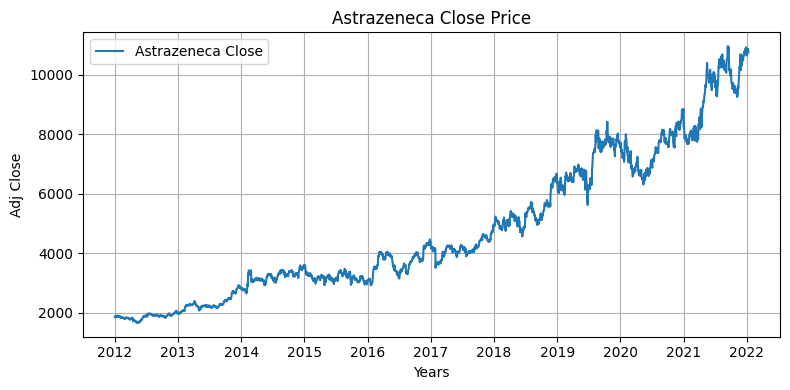

In [ ]:
years = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
plt.figure(figsize=(8, 4))
plt.plot(astrazenica_train['Adj Close'], label='Astrazeneca Close')
plt.title('Astrazeneca Close Price')
plt.ylabel('Adj Close')
plt.xlabel('Years')
positions = range(0, len(astrazenica_train), len(astrazenica_train) // (len(years) - 1))
plt.xticks(positions, years)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
for company in banks_train:
  company['Date'] = pd.to_datetime(company['Date'])
  company['Month'] = company['Date'].dt.month
  company['Monthly Avg'] = company['Volume'].groupby(company['Month']).mean()

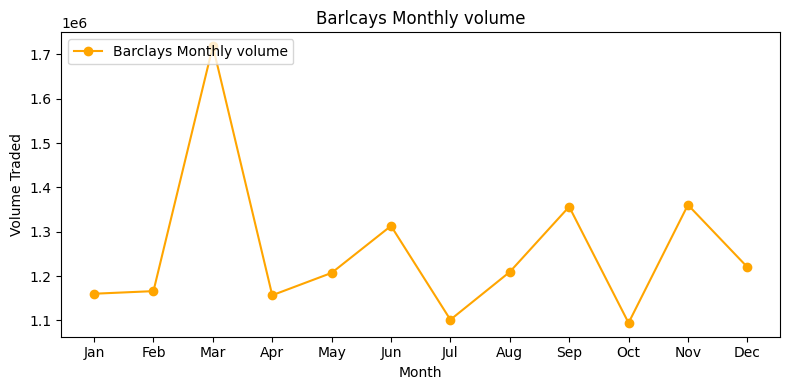

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(company['Monthly Avg'], label='Barclays Monthly volume', marker='o', linestyle='-',color='orange')
plt.title('Barlcays Monthly volume')
plt.ylabel('Volume Traded')
plt.legend(loc='upper left')
plt.xlabel('Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

In [ ]:
barclays_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Monthly Avg
0,2012-01-03,167.197800,172.324600,164.611298,172.093597,120.879143,54061195,1,NaN
1,2012-01-04,170.985107,173.987305,169.253098,173.987305,122.209290,40318622,1,4.428877e+07
2,2012-01-05,175.511505,176.647705,168.860504,169.645706,119.159744,52124639,1,5.271632e+07
3,2012-01-06,169.507095,175.524399,169.045303,172.186005,120.944069,33288254,1,6.328096e+07
4,2012-01-09,171.400803,174.587708,163.271896,164.518906,115.558655,51055384,1,5.659473e+07


In [ ]:
# Define the rolling window size (e.g., 20 days)
window_size = 20
for company in banks_train:
  company['Rolling Volatility'] = company['Adj Close'].rolling(window=window_size).std()

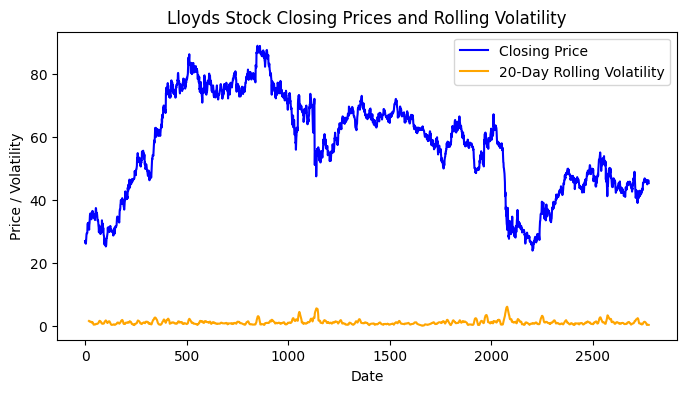

In [ ]:
# Plot the closing prices and rolling volatility
plt.figure(figsize=(8, 4))
plt.plot(lloyds_train['Close'], label='Closing Price', color='blue')
plt.plot(lloyds_train['Rolling Volatility'], label=f'{window_size}-Day Rolling Volatility', color='orange')
plt.title('Lloyds Stock Closing Prices and Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Price / Volatility')
plt.legend()
plt.show()


In [ ]:
for company in banks_train:
  company.drop(columns=['Month','Monthly Avg','Rolling Volatility'],inplace=True)

#Data pre-processing

In [ ]:
def calculate_rsi(data, period=14):
    delta = data['Adj Close'].diff()
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)

    avg_gain = gain.rolling(window=period, min_periods=1).mean()
    avg_loss = loss.rolling(window=period, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

In [ ]:
def calculate_macd(data, short_period=12, long_period=26, signal_period=9):
    short_ema = data['Adj Close'].ewm(span=short_period, adjust=False).mean()
    long_ema = data['Adj Close'].ewm(span=long_period, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal_period, adjust=False).mean()
    histogram = macd - signal_line
    return macd, signal_line, histogram

In [ ]:
# Prepare data for LSTM and CNN
def create_dataset(dataset, look_back):
    X= []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), :]
        X.append(a)
    return np.array(X)

In [ ]:
# Prepare data for LSTM and CNN
def create_target(dataset, look_back):
    Y = []
    for i in range(len(dataset) - look_back - 1):
        Y.append(dataset[i + look_back, 0])
    return np.array(Y)

In [ ]:
def create_plot(y_train, predictions, actual_prices,name):
  plt.figure(figsize=(12, 5))
  plt.plot(range(len(actual_prices)), actual_prices, label='Actual Price')
  plt.plot(range(len(predicted_prices)), predicted_prices, label='Predicted Price')
  plt.title(f'{name} Stock Price Prediction')
  plt.xlabel('Time')
  plt.ylabel('Price')
  plt.legend()
  plt.show()

In [ ]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [ ]:
for train, target in zip(stocks_train, stocks_train_target):
    train.dropna(inplace=True)
    target['Adj Close'] = (train['Adj Close'])
    train.drop(columns=['Date','Adj Close'],inplace=True)


In [ ]:
barclays_train1.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
for test, target in zip(stocks_test, stocks_test_target):
    test.dropna(inplace=True)
    target['Adj Close'] = (test['Adj Close'])
    test.drop(columns=['Date','Adj Close'],inplace=True)


In [ ]:
barclays_test_target.shape

(398, 1)

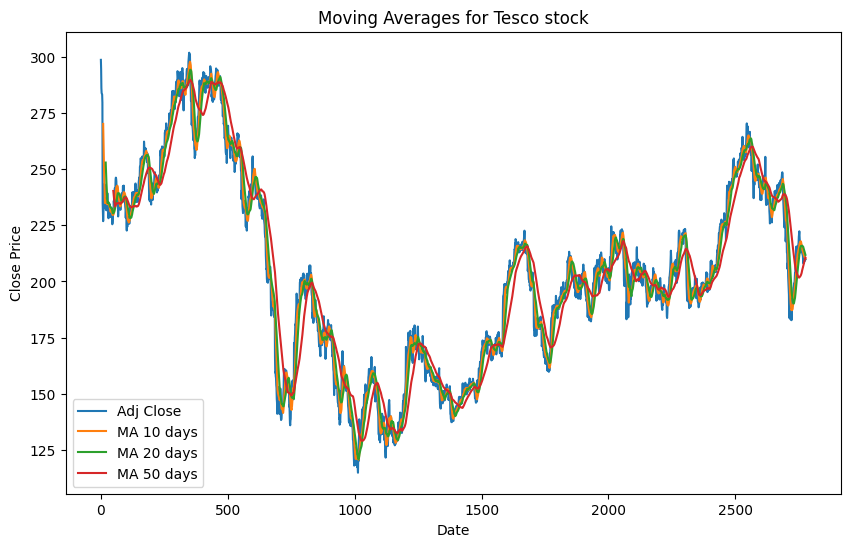

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in stocks_train1:
        column_name = f"MA {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

    for company in stocks_test1:
        column_name = f"MA {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


plt.figure(figsize=(10,6 ))
plt.plot(tesco_train1[['Adj Close', 'MA 10 days', 'MA 20 days', 'MA 50 days']])
plt.title('Moving Averages for Tesco stock')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(['Adj Close', 'MA 10 days', 'MA 20 days', 'MA 50 days']) # Added labels to legend function
plt.show()

In [ ]:
for company in stocks_train1:
    company['RSI'] = calculate_rsi(company)
    company['MACD'], company['Signal Line'], company['MACD Histogram'] = calculate_macd(company)

for company in stocks_test1:
    company['RSI'] = calculate_rsi(company)
    company['MACD'], company['Signal Line'], company['MACD Histogram'] = calculate_macd(company)


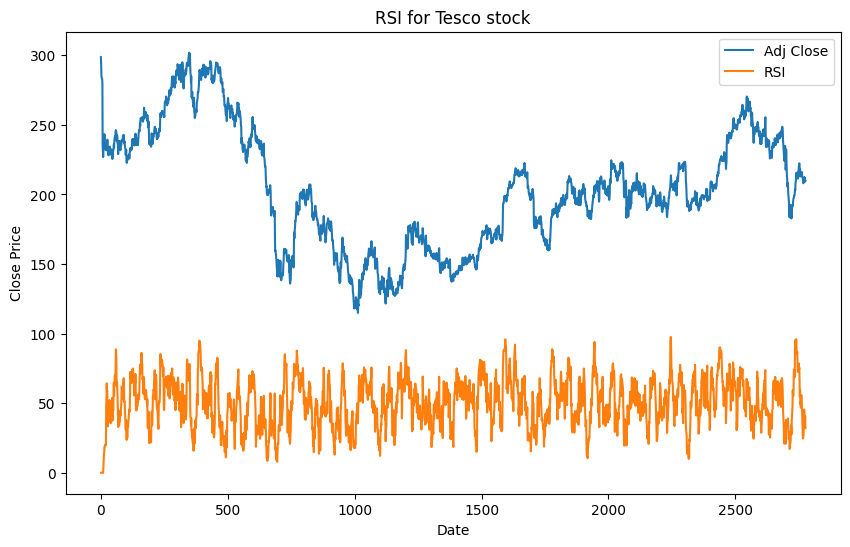

In [ ]:
plt.figure(figsize=(10,6 ))
plt.plot(tesco_train1[['Adj Close', 'RSI']])
plt.title('RSI for Tesco stock')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(['Adj Close', 'RSI'])
plt.show()

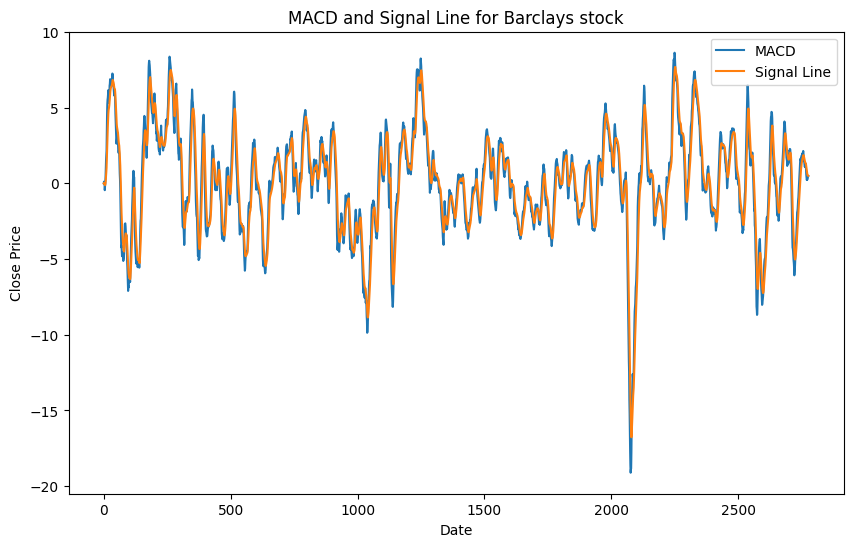

In [ ]:
plt.figure(figsize=(10,6 ))
plt.plot(barclays_train1[['MACD','Signal Line']])
plt.title('MACD and Signal Line for Barclays stock')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(['MACD','Signal Line'])
plt.show()

In [ ]:
for company in stocks_train1:
  company.drop(columns=['Date','MA 50 days','MACD Histogram'],inplace=True)
  company.dropna(inplace=True)

for company in stocks_test1:
  company.drop(columns=['Date','MA 50 days','MACD Histogram'],inplace=True)
  company.dropna(inplace=True)

for train, target in zip(stocks_train1, stocks_train_target1):
    target['Adj Close'] = (train['Adj Close'])
    train.drop(columns=['Adj Close'],inplace=True)

for test, target in zip(stocks_test1, stocks_test_target1):
    target['Adj Close'] = (test['Adj Close'])
    test.drop(columns=['Adj Close'],inplace=True)

KeyError: 'Adj Close'

In [ ]:
lstm_model1 = Sequential()
lstm_model1.add(LSTM(100, return_sequences=True, input_shape=(50, 5)))
lstm_model1.add(LSTM(100, return_sequences=True))
lstm_model1.add(LSTM(50, return_sequences=False))
lstm_model1.add(Dense(50))
lstm_model1.add(Dense(1))
lstm_model1.summary()

lstm_model1.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
cnn_model1 = Sequential()
cnn_model1.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(50, 5)))
cnn_model1.add(MaxPooling1D(pool_size=2))
cnn_model1.add(Flatten())

cnn_model1.add(Dense(32, activation='relu'))
cnn_model1.add(Dense(1))

cnn_model1.summary()
cnn_model1.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
for stock, target , name in zip(stocks_train , stocks_train_target, stocks_name):
  look_back = 50
  scaler = MinMaxScaler(feature_range=(0, 1))
  stock_scaled = scaler.fit_transform(stock)
  target_scaled = scaler.fit_transform(target)
  X_train = create_dataset(stock_scaled, look_back)
  y_train = create_target(target_scaled, look_back)
  print(f'{name} iteration')

  lstm_model1.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)
  cnn_model1.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

In [ ]:
results = {'name':[],'MAE': [], 'RMSE': [], 'R2': []}

for stock, target, name,train in zip(stocks_test , stocks_test_target,stocks_name,stocks_train_target):
  look_back = 50
  scaler = MinMaxScaler(feature_range=(0, 1))
  y_train = scaler.fit_transform(train)
  stock_scaled = scaler.fit_transform(stock)
  target_scaled = scaler.fit_transform(target)
  Y_train = create_target(y_train, look_back)
  X_test = create_dataset(stock_scaled, look_back)
  y_test = create_target(target_scaled, look_back)
  print(f'{name} new iteration')
  predictions = lstm_model1.predict(X_test)
  predicted_prices = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()
  actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
  years_to_display = 2
  create_plot(Y_train, predicted_prices,actual_prices,name)

  mae, rmse, r2 = evaluate_model(actual_prices, predicted_prices)
  print(f'Model Evaluation - {name}:')
  print(f'Mean Absolute Error (MAE): {mae}')
  print(f'Root Mean Squared Error (RMSE): {rmse}')
  print(f'R-squared (R2) Score: {r2}')
  results['name'].append(name)
  results['MAE'].append(mae)
  results['RMSE'].append(rmse)
  results['R2'].append(r2)

results_df = pd.DataFrame(results)
print(results_df)
avg_mae = results_df['MAE'].mean()
avg_rmse = results_df['RMSE'].mean()
avg_r2 = results_df['R2'].mean()

print(f'Average MAE: {avg_mae}')
print(f'Average RMSE: {avg_rmse}')
print(f'Average R2 Score: {avg_r2}')
  #create_plot(Y_train,predicted_prices, actual_prices,scaler,name,years_to_display)

In [ ]:
results = {'name':[],'MAE': [], 'RMSE': [], 'R2': []}
for stock, target, name,train in zip(stocks_test , stocks_test_target,stocks_name,stocks_train_target):
  look_back = 50
  scaler = MinMaxScaler(feature_range=(0, 1))
  y_train = scaler.fit_transform(train)
  stock_scaled = scaler.fit_transform(stock)
  target_scaled = scaler.fit_transform(target)
  Y_train = create_target(y_train, look_back)
  X_test = create_dataset(stock_scaled, look_back)
  y_test = create_target(target_scaled, look_back)
  print(f'{name} new iteration')
  predictions = cnn_model1.predict(X_test)
  predicted_prices = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()
  actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
  years_to_display = 2
  create_plot(Y_train, predicted_prices,actual_prices,name)

  mae, rmse, r2 = evaluate_model(actual_prices, predicted_prices)
  print(f'Model Evaluation - {name}:')
  print(f'Mean Absolute Error (MAE): {mae}')
  print(f'Root Mean Squared Error (RMSE): {rmse}')
  print(f'R-squared (R2) Score: {r2}')
  results['name'].append(name)
  results['MAE'].append(mae)
  results['RMSE'].append(rmse)
  results['R2'].append(r2)

results_df = pd.DataFrame(results)
print(results_df)
avg_mae = results_df['MAE'].mean()
avg_rmse = results_df['RMSE'].mean()
avg_r2 = results_df['R2'].mean()

print(f'Average MAE: {avg_mae}')
print(f'Average RMSE: {avg_rmse}')
print(f'Average R2 Score: {avg_r2}')
  #create_plot(Y_train,predicted_prices, actual_prices,scaler,name,years_to_display)

In [ ]:
# # Initialize the XGBoost regressor
from xgboost import XGBRegressor
# XGB_model = XGBRegressor(n_estimators=, learning_rate=0.01, max_depth=10, objective='reg:squarederror')

In [ ]:
XGB_model1 = XGBRegressor(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=10,
    min_child_weight=1,
    gamma=0,
    subsample=0.6,
    colsample_bytree=0.6,
    reg_alpha=0.001,
    reg_lambda=0.001,
    objective='reg:squarederror',
    eval_metric='rmse'
)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
for stock_train, target_train,stock_test,target_test, name in zip(stocks_train , stocks_train_target,stocks_test,stocks_test_target, stocks_name):
  scaler= MinMaxScaler(feature_range=(0, 1))
  X_train= scaler.fit_transform(stock_train)
  y_train = scaler.fit_transform(target_train)
  X_test = scaler.fit_transform(stock_test)
  y_test = scaler.fit_transform(target_test)
  print(f'{name} iteration')
  XGB_model1.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

In [ ]:
results = {'name':[],'MAE': [], 'RMSE': [], 'R2': []}
for test, target, name,train in zip(stocks_test , stocks_test_target,stocks_name,stocks_train_target):
  scaler = MinMaxScaler(feature_range=(0, 1))
  y_train = scaler.fit_transform(train)
  X_test = scaler.fit_transform(test)
  y_test = scaler.fit_transform(target)
  print(f'{name} new iteration')
  predictions = XGB_model1.predict(X_test)
  predicted_prices = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()
  actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
  years_to_display = 2
  create_plot(Y_train, predicted_prices,actual_prices,name)

  mae, rmse, r2 = evaluate_model(actual_prices, predicted_prices)
  print(f'Model Evaluation - {name}:')
  print(f'Mean Absolute Error (MAE): {mae}')
  print(f'Root Mean Squared Error (RMSE): {rmse}')
  print(f'R-squared (R2) Score: {r2}')
  results['name'].append(name)
  results['MAE'].append(mae)
  results['RMSE'].append(rmse)
  results['R2'].append(r2)

results_df = pd.DataFrame(results)
print(results_df)
avg_mae = results_df['MAE'].mean()
avg_rmse = results_df['RMSE'].mean()
avg_r2 = results_df['R2'].mean()

print(f'Average MAE: {avg_mae}')
print(f'Average RMSE: {avg_rmse}')
print(f'Average R2 Score: {avg_r2}')
  #create_plot(y_train,predicted_prices, actual_prices,scaler,name,years_to_display)

# LSTM model

In [ ]:
lstm_model2 = Sequential()
lstm_model2.add(LSTM(100, return_sequences=True, input_shape=(50, 10)))
lstm_model2.add(LSTM(100, return_sequences=True))
lstm_model2.add(LSTM(50, return_sequences=False))
lstm_model2.add(Dense(50))
lstm_model2.add(Dense(1))
lstm_model2.summary()

lstm_model2.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
cnn_model2 = Sequential()
cnn_model2.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(50, 10)))
cnn_model2.add(MaxPooling1D(pool_size=2))
cnn_model2.add(Flatten())

cnn_model2.add(Dense(32, activation='relu'))
cnn_model2.add(Dense(1))

cnn_model2.summary()
cnn_model2.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
for stock, target , name in zip(stocks_train1 , stocks_train_target1, stocks_name):
  look_back = 50
  scaler = MinMaxScaler(feature_range=(0, 1))
  stock_scaled = scaler.fit_transform(stock)
  target_scaled = scaler.fit_transform(target)
  X_train = create_dataset(stock_scaled, look_back)
  y_train = create_target(target_scaled, look_back)
  print(f'{name} iteration')
  lstm_model2.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)
  cnn_model2.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

In [ ]:
# fig, axs = plt.subplots(17,1, figsize=(8,16))
results = {'name':[],'MAE': [], 'RMSE': [], 'R2': []}

for stock, target, name,train in zip(stocks_test1 , stocks_test_target1,stocks_name,stocks_train_target1):
  look_back = 50
  scaler = MinMaxScaler(feature_range=(0, 1))
  y_train = scaler.fit_transform(train)
  stock_scaled = scaler.fit_transform(stock)
  target_scaled = scaler.fit_transform(target)
  Y_train = create_target(y_train, look_back)
  X_test = create_dataset(stock_scaled, look_back)
  y_test = create_target(target_scaled, look_back)
  print(f'{name} new iteration')
  predictions = lstm_model2.predict(X_test)
  predicted_prices = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()
  actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
  years_to_display = 2
  create_plot(Y_train, predicted_prices,actual_prices,name)
  #results = {'name':[],'MAE': [], 'RMSE': [], 'R2': []}
  mae, rmse, r2 = evaluate_model(actual_prices, predicted_prices)
  print(f'Model Evaluation - {name}:')
  print(f'Mean Absolute Error (MAE): {mae}')
  print(f'Root Mean Squared Error (RMSE): {rmse}')
  print(f'R-squared (R2) Score: {r2}')
  results['name'].append(name)
  results['MAE'].append(mae)
  results['RMSE'].append(rmse)
  results['R2'].append(r2)

results_df = pd.DataFrame(results)
print(results_df)
avg_mae = results_df['MAE'].mean()
avg_rmse = results_df['RMSE'].mean()
avg_r2 = results_df['R2'].mean()

print(f'Average MAE: {avg_mae}')
print(f'Average RMSE: {avg_rmse}')
print(f'Average R2 Score: {avg_r2}')
  #create_plot(Y_train,predicted_prices, actual_prices,scaler,name,years_to_display)

In [ ]:
results = {'name':[],'MAE': [], 'RMSE': [], 'R2': []}
for stock, target, name,train in zip(stocks_test1 , stocks_test_target1,stocks_name,stocks_train_target1):
  look_back = 50
  scaler = MinMaxScaler(feature_range=(0, 1))
  y_train = scaler.fit_transform(train)
  stock_scaled = scaler.fit_transform(stock)
  target_scaled = scaler.fit_transform(target)
  Y_train = create_target(y_train, look_back)
  X_test = create_dataset(stock_scaled, look_back)
  y_test = create_target(target_scaled, look_back)
  print(f'{name} new iteration')
  predictions = cnn_model2.predict(X_test)
  predicted_prices = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()
  actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
  years_to_display = 2
  create_plot(Y_train, predicted_prices,actual_prices,name)

  mae, rmse, r2 = evaluate_model(actual_prices, predicted_prices)
  print(f'Model Evaluation - {name}:')
  print(f'Mean Absolute Error (MAE): {mae}')
  print(f'Root Mean Squared Error (RMSE): {rmse}')
  print(f'R-squared (R2) Score: {r2}')
  results['name'].append(name)
  results['MAE'].append(mae)
  results['RMSE'].append(rmse)
  results['R2'].append(r2)

results_df = pd.DataFrame(results)
print(results_df)
avg_mae = results_df['MAE'].mean()
avg_rmse = results_df['RMSE'].mean()
avg_r2 = results_df['R2'].mean()

print(f'Average MAE: {avg_mae}')
print(f'Average RMSE: {avg_rmse}')
print(f'Average R2 Score: {avg_r2}')

  #create_plot(Y_train,predicted_prices, actual_prices,scaler,name,years_to_display)

# XGBoost model

In [ ]:
XGB_model2 = XGBRegressor(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=10,
    min_child_weight=1,
    gamma=0,
    subsample=0.6,
    colsample_bytree=0.6,
    reg_alpha=0.001,
    reg_lambda=0.001,
    objective='reg:squarederror',
    eval_metric='rmse'
)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
for stock_train, target_train,stock_test,target_test, name in zip(stocks_train1 , stocks_train_target1,stocks_test1,stocks_test_target1, stocks_name):
  scaler= MinMaxScaler(feature_range=(0, 1))
  X_train= scaler.fit_transform(stock_train)
  y_train = scaler.fit_transform(target_train)
  X_test = scaler.fit_transform(stock_test)
  y_test = scaler.fit_transform(target_test)
  print(f'{name} iteration')
  XGB_model2.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

In [ ]:
results = {'name':[],'MAE': [], 'RMSE': [], 'R2': []}
for test, target, name,train in zip(stocks_test1 , stocks_test_target1,stocks_name,stocks_train_target1):
  scaler = MinMaxScaler(feature_range=(0, 1))
  y_train = scaler.fit_transform(train)
  X_test = scaler.fit_transform(test)
  y_test = scaler.fit_transform(target)
  print(f'{name} new iteration')
  predictions = XGB_model2.predict(X_test)
  predicted_prices = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()
  actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
  years_to_display = 2
  create_plot(Y_train, predicted_prices,actual_prices,name)

  mae, rmse, r2 = evaluate_model(actual_prices, predicted_prices)
  results['name'].append(name)
  results['MAE'].append(mae)
  results['RMSE'].append(rmse)
  results['R2'].append(r2)

results_df = pd.DataFrame(results)
print(results_df)
avg_mae = results_df['MAE'].mean()
avg_rmse = results_df['RMSE'].mean()
avg_r2 = results_df['R2'].mean()

print(f'Average MAE: {avg_mae}')
print(f'Average RMSE: {avg_rmse}')
print(f'Average R2 Score: {avg_r2}')